In [5]:
import os
import glob
import torch
import numpy as np
import matplotlib.pyplot as plt

from sklearn import preprocessing, model_selection, metrics

import config
import dataset

%matplotlib inline

In [3]:
image_files = glob.glob(os.path.join(config.DATA_DIR, "*.png"))
targets_orig = [x.split('/')[-1][:-4] for x in image_files]
targets = [[c for c in x] for x in targets_orig]
# Flattens the target
targets_flat = [c for clist in targets for c in clist]

lbl_enc = preprocessing.LabelEncoder()
lbl_enc.fit(targets_flat)

targets_enc = [lbl_enc.transform(x) for x in targets]
targets_enc = np.array(targets_enc) + 1

train_imgs, test_imgs, train_targets, test_targets, train_orig_targets, test_orig_targets = model_selection.train_test_split(
    image_files, targets_enc, targets_orig, test_size=0.1, random_state=17)

train_dataset = dataset.ClassficationDataset(
    image_paths=train_imgs, targets=train_targets, resize=(config.IMAGE_HEIGHT, config.IMAGE_WIDTH))

In [4]:
train_dataset[0]

{'images': tensor([[[1.1700, 1.1700, 1.1700,  ..., 2.1804, 2.1804, 2.1804],
          [1.1700, 1.1700, 1.1700,  ..., 2.1804, 2.1804, 2.1804],
          [1.1700, 1.1700, 1.1700,  ..., 2.1804, 2.1804, 2.1804],
          ...,
          [1.2214, 1.2214, 1.2214,  ..., 2.2318, 2.2318, 2.2318],
          [1.2214, 1.2214, 1.2214,  ..., 2.2318, 2.2318, 2.2318],
          [1.2214, 1.2214, 1.2214,  ..., 2.2318, 2.2318, 2.2318]],
 
         [[1.3256, 1.3256, 1.3256,  ..., 2.3585, 2.3585, 2.3585],
          [1.3256, 1.3256, 1.3256,  ..., 2.3585, 2.3585, 2.3585],
          [1.3256, 1.3256, 1.3256,  ..., 2.3585, 2.3585, 2.3585],
          ...,
          [1.3782, 1.3782, 1.3782,  ..., 2.4111, 2.4111, 2.4111],
          [1.3782, 1.3782, 1.3782,  ..., 2.4111, 2.4111, 2.4111],
          [1.3782, 1.3782, 1.3782,  ..., 2.4111, 2.4111, 2.4111]],
 
         [[1.5420, 1.5420, 1.5420,  ..., 2.5703, 2.5703, 2.5703],
          [1.5420, 1.5420, 1.5420,  ..., 2.5703, 2.5703, 2.5703],
          [1.5420, 1.5420, 1.5

In [8]:
npimg = train_dataset[0]["images"].numpy()
npimg.shape

(3, 75, 300)

In [10]:
npimg = np.transpose(npimg, (1, 2, 0))
npimg.shape

(75, 300, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


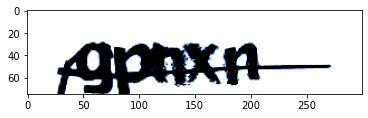

In [11]:
plt.imshow(npimg)